* 이 커널은 [DieTanic](https://www.kaggle.com/ash316/eda-to-prediction-dietanic) 커널을 필사하며 정리한 것입니다.

# EDA To Prediction (DieTanic)

    "때로는 인생은 잔인한 해학적 감각을 지닌다. 늘 원했던 것을 가장 나쁜 때에 준다."
    - Lisa Klaypas

타이타닉 호의 침몰은 역사상 가장 유명한 해상사고 중 하나입니다. 1912년 4월 15일, 타이타닉 호는 첫 항해 중 빙산과 충돌하여 침몰했고 2224명의 승객 중 1502명이 사망했습니다. 이 커널의 제목이 **DieTanic**인 이유가 그것입니다. 이는 매우 불행한 재해이며 그 누구도 잊을 수 없을 것입니다.<br><br>
타이타닉 호는 건조하는 데 약 7500만 달러가 들었으며 충돌로 인해 바다속에 가라앉았습니다. 타이타닉 호의 데이터셋은 데이터사이언스 탐험을 시작하고 캐글 컴페티션에 참여하는 초보자들에게 아주 유용한 데이터셋입니다.<br><br>
이 notebook의 목적은 **예측 모델링 문제를 해결하는 workflow에 대한 아이디어**를 제공하는 데에 있습니다. 어떻게 feature들을 확인하고 어떻게 새로운 feature를 추가하는지, 그리고 몇몇 머신 러닝 개념에 대해서. 이 notebook은 newbie들도 쉽게 이해할 수 있도록 가능한 한 기본적인 내용으로 구성되었습니다.<br><br><br>

## Content of the Notebook:
**Part1: Exploratory Data Analysis(EDA):**<br>
1) Analysis of the features

2) Finding any relations or trends considering multiple features
<br><br>

**Part2: Feature Engineering and Data Cleaning:**<br>
1) Adding any few features

2) Removing redundant features

3) Converting features into suitable form for modeling
<br><br>

**Part3: Predictive Modeling**<br>
1) Running Basic Algorithms

2) Cross Validation

3) Ensembling

4) Important Features Extraction

<br><br>

# Part1: Exploratory Data Analysis(EDA)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [9]:
data = pd.read_csv('/content/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data.isnull().sum() # null values들을 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Age, Cabin, Embarked**에 null value가 있습니다. 나중에 fix할 것입니다.
<br><br>

###How many Survived??

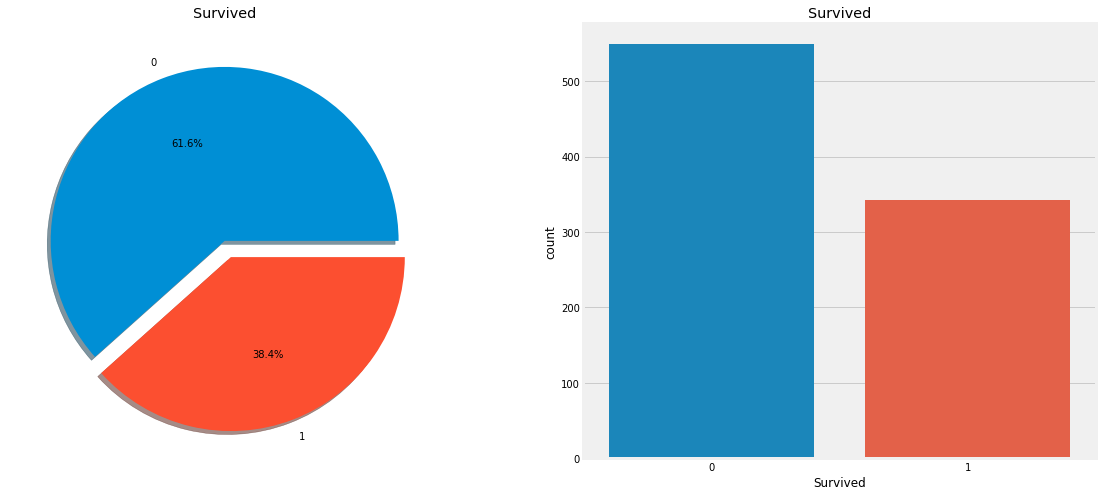

In [13]:
f,ax = plt.subplots(1,2,figsize=(18,8))

data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')

plt.show()

많은 수의 승객이 생존하지 못했다는 것을 알 수 있습니다.

train set의 891명의 승객 중 350명(**38.4%**)만이 생존했습니다. 우리는 데이터로부터 더 좋은 insight를 얻기 위해 좀 더 자세히 살펴보고, 어떤 category의 승객이 생존했는지(혹은 생존하지 못했는지)에 대해 알아봐야 합니다.

이제부터 dataset의 서로 다른 feature들을 이용해서 생존률을 확인할 것입니다. Sex, Embarked, Age 등등...

우선 feature의 type에 대해 이해하고 넘어가겠습니다.

<br><br>

## Types Of Features

#### Categorical Features:
범주형 변수는 둘 이상의 범주로 구분되고 각각의 값들은 어느 범주에 속합니다. 예를 들어, 성별은 남성과 여성의 범주로 구분되는 범주형 변수입니다. 각각의 값은 순서나 상하관계를 지니지 않습니다. 명목 변수(Norminal Variable)라고도 합니다.

**범주형 변수 : Sex, Embarked**

<br>

#### Ordinal Features:
서수형 변수는 범주형 변수와 비슷하지만, 값들 간에 순서가 존재한다는 차이가 있습니다. 예를 들어 **키**라는 변수에 **큼, 중간, 작음**이라는 값이 있다면, 키는 서수형 변수입니다.

**서수형 변수 : PClass**

<br>

#### Continuous Feature:
연속형 변수는 값들이 최소값과 최대값 사이에서 연속적으로 존재하는 변수를 말합니다.

**연속형 변수 : Age**


<br><br>

## Analysing The Feature
### Sex (Categorical Feature)

In [15]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

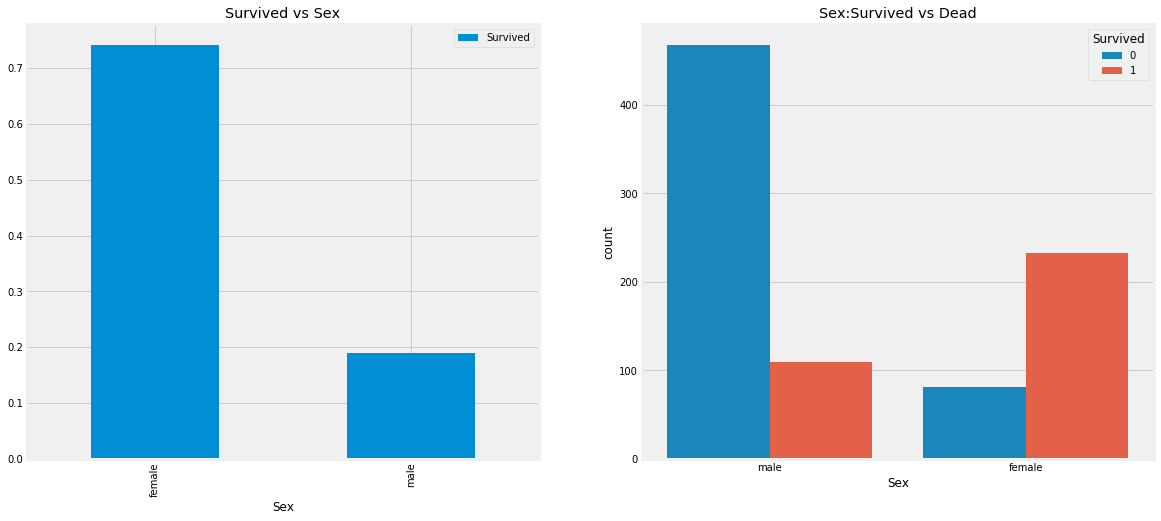

In [17]:
f,ax = plt.subplots(1,2,figsize=(18,8))

data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')

plt.show()

흥미롭습니다. 남성 승객의 수는 여성 승객의 두 배가 넘습니다. 그러나 구조된 여성의 수는 구조된 남성의 두 배 가까이 됩니다. **여성의 생존율은 거의 75%인 반면 남성의 생존율은 18~19% 가량입니다.**

Sex가 매우 중요한 feature임을 보여줍니다. 다른 feature도 살펴봅시다.

<br><br>

### Pclass (Ordinal Feature)

In [18]:
pd.crosstab(data['Pclass'], data['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


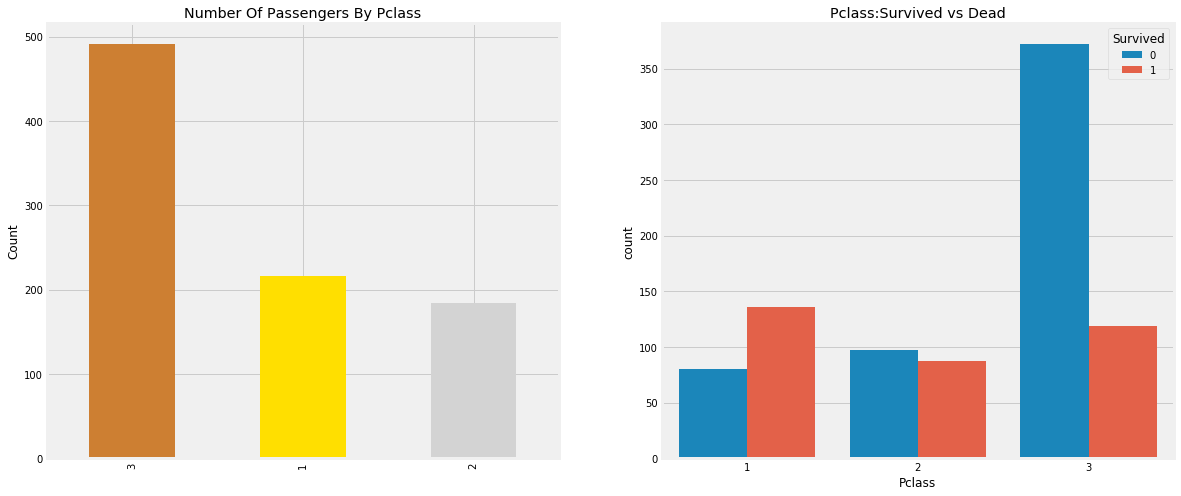

In [21]:
f,ax = plt.subplots(1,2,figsize=(18,8))

data['Pclass'].value_counts().plot.bar(color = ['#cd7f32','#ffdf00','#d3d3d3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')

plt.show()

사람들은 **돈이 전부가 아니다**라고 말합니다. 하지만 우리는 명백하게 Pclass 1의 승객의 구조율이 높음을 확인할 수 있습니다. 심지어 Pclass 3의 승객 수는 매우 높지만, 생존자는 매우 적습니다(약 **25%**).

Pclass 1의 생존율은 약 **63%**이고 Pclass 2의 생존율은 약 **48%**입니다. 돈과 지위가 중요합니다. 이 무슨 물질만능주의.

좀 더 자세히 살펴보고 다른 흥미로운 점이 없는지 확인해봅시다. 한번 **Sex와 Pclass**에 대한 생존율을 확인해보겠습니다.

In [24]:
pd.crosstab([data['Sex'], data['Survived']], data['Pclass'], margins=True).style.background_gradient(cmap='summer_r')

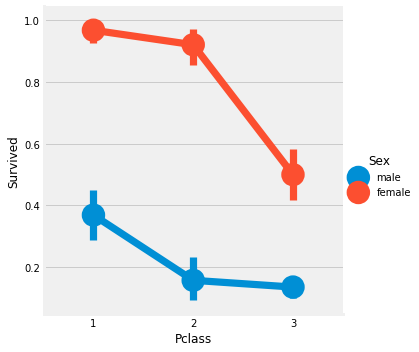

In [25]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

이때 **FactorPlot**을 사용하는데, 범주형 값들을 쉽게 분리해서 볼 수 있기 때문입니다.

**CrossTab**과 **FactorPlot**을 보면, **Pclass 1의 여성**의 생존률이 **95~96%** 정도임을 알 수 있습니다. 94명의 Pclass 1 여성 승객 중 단 3명이 사망했습니다.

또한 Pclass와 무관하게 구조하는 과정에서 여성에게 우선순위가 있었음은 확실합니다. 남성은 Pclass 1이라도 생존율이 매우 낮습니다.

Pclass 또한 매우 중요한 feature로 보입니다. 다른 feature를 살펴봅시다.

<br><br>

## Age (Continuous Feature)